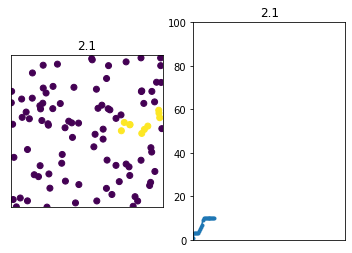

KeyboardInterrupt: 

In [52]:
# This file explores a simple model to mitigate the exponential spread of a disease.

# Packages:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from IPython.display import clear_output
from math import *

# Parameters:
N = 100 # number of indiviuals
N_home = 0 # number of indiviuals staying at home
radius_contamination = 0.5 # radius of contamination
speed = 5 # speed of invidiuals
length_x = 10 # length in the x-direction
length_y = 10 # length in the y-direction
recovery_time = 5 # time to recover from the disease
time_step = 0.1 # integration time-step
end_time = 16 # end time of the time-integration

# Set-up intial positions as complex numbers:
positions = length_x*np.random.random_sample((N,1)) + 1j*length_y*np.random.random_sample((N,1))

# Set-up a vector to indicate whether an indiviual is healthy or sick, if they've been already exposed and therefore 
# are immune, for how long they've been sick, and if they're staying home:
covid19 = np.zeros((N,1)) # 0 means healthy, 1 means sick
rand_indiv = np.random.randint(0,N)
covid19[rand_indiv] = 1 # choose a random indiviual to be sick
covid19_immunity = np.zeros((N,1)) # 0 means not immune, 1 means immune
covid19_immunity[rand_indiv] = 1
covid19_times = np.zeros((N,1))
covid19_at_home = np.zeros((N,1)) # 0 means free, 1 means staying at home
covid19_at_home[0:N_home] = 1

# Plot initial conditions:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(np.real(positions), np.imag(positions), c=covid19)
axs[0].axis('equal')
axs[0].axis('square')
axs[0].set(xlim=(0,length_x), ylim=(0,length_y))
axs[0].set_title(0)
axs[1].set(xlim=(0,end_time/time_step), ylim=(0,N))
plt.show()
    
# Time-integration:
t = 0 
number_sick_indivs = [1]
while t <= end_time:
        
    # Update positions:
    for k in range(0,N):
        
        # Pick a random angle for the velocity at each time:
        velocity = speed*np.exp(2*pi*np.random.random_sample()*1j) 
        
        # Update positions of the non-confined individuals:
        if (covid19_at_home[k] == 0):
            positions[k] = positions[k] + velocity*time_step
        
        # Periodic boundary conditions:
        if (np.real(positions[k])>length_x):
            positions[k] = positions[k] - length_x
        elif (np.real(positions[k])<0):
            positions[k] = positions[k] + length_x
        elif (np.imag(positions[k])>length_y):
            positions[k] = positions[k] - 1j*length_y
        elif (np.imag(positions[k])<0):
            positions[k] = positions[k] + 1j*length_y
    
        # Update covid19 times:
        if (covid19[k] == 1):
            covid19_times[k] = covid19_times[k] + time_step
        if (covid19_times[k] >= recovery_time):
            covid19[k] = 0
            
    # Update covid19 healthy/sick:
    for k in range(0,N):
        for l in range(0,N):
            distance = abs(positions[k] - positions[l])
            if ((distance < radius_contamination) & (covid19[l] == 1) & (covid19_immunity[k] == 0)):
                covid19[k] = 1 
                covid19_immunity[k] = 1
                break
        
    # Plot new positions and number of sick individuals:
    clear_output(wait=True)
    fig, axs = plt.subplots(1, 2)
    axs[0].scatter(np.real(positions), np.imag(positions), c=covid19)
    axs[0].axis('equal')
    axs[0].axis('square')
    axs[0].set(xlim=(0,length_x), ylim=(0,length_y))
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[0].set_title(round(t,2))
    number_sick_indivs.append(np.sum(covid19))
    axs[1].plot(number_sick_indivs, '.-')
    axs[1].set(xlim=(0,end_time/time_step), ylim=(0, N))
    axs[1].set_xticks([])
    axs[1].set_title(round(t,2))
    plt.show()
    
    # Update time:
    t = t + time_step

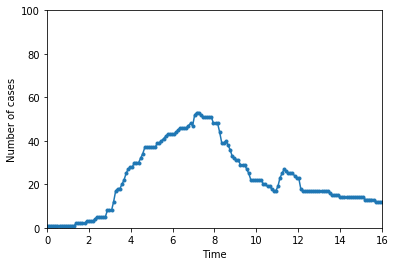

In [48]:
plt.plot(np.linspace(0, end_time, len(number_sick_indivs)), number_sick_indivs, '.-');
plt.xlim(0, end_time)
plt.ylim(0, N)
plt.xlabel('Time')
plt.ylabel('Number of cases')
#plt.savefig('/Users/hadrienmontanelli/Downloads/free.png')
#plt.savefig('/Users/hadrienmontanelli/Downloads/confined25.png')
#plt.savefig('/Users/hadrienmontanelli/Downloads/confined50.png')
#plt.savefig('/Users/hadrienmontanelli/Downloads/confined75.png')
#plt.savefig('/Users/hadrienmontanelli/Downloads/confined90.png')